In [1]:
import do_functions as do
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay



In [2]:
df = do.read_and_merge('paz_metadata_actualitzat.pkl',
                       'paz_profiles_actualitzat.pkl')
df = do.clean_dataframe(df)

In [3]:
len(df)

90862

### MCC for 99 percentile optimal range

In [4]:
df_avg = do.average(df,0.1,6.4)
len(df_avg)

39598

In [5]:
y_true = df_avg['precipBelow6'].to_numpy()>4.7
y_pred = df_avg['avgh001h064'].to_numpy()>10

In [6]:
matthews_corrcoef(y_true, y_pred)

0.4171526803854732

In [7]:
confusion_matrix(y_true, y_pred)

array([[39353,    87],
       [   93,    65]])

### MCC for 98 percentile optimal range

In [8]:
df_avg = do.average(df,0.1,7.7)
len(df_avg)

48158

In [9]:
y_true = df_avg['precipBelow6'].to_numpy()>3.32
y_pred = df_avg['avgh001h077'].to_numpy()>6.75
matthews_corrcoef(y_true, y_pred)

0.4595199099821819

In [10]:
confusion_matrix(y_true, y_pred)

array([[47553,   242],
       [  181,   182]])

### MCC for 97 percentile optimal range

In [11]:
df_avg = do.average(df,0.1,6.0)
len(df_avg)

39598

In [12]:
y_true = df_avg['precipBelow6'].to_numpy()>2.76
y_pred = df_avg['avgh001h060'].to_numpy()>5.94
matthews_corrcoef(y_true, y_pred)

0.5152869846870696

In [13]:
confusion_matrix(y_true, y_pred)

array([[38792,   336],
       [  189,   281]])

### MCC for 96 percentile optimal range

In [4]:
df_avg = do.average(df,0.6,9.3)
len(df_avg)

87919

In [5]:
len(df_avg[df_avg['precipBelow6']>2.03])

1148

In [7]:
y_true = df_avg['precipBelow6'].to_numpy()>2.03
y_pred = df_avg['avgh006h093'].to_numpy()>3.84
matthews_corrcoef(y_true, y_pred)

0.5050218669586966

In [8]:
matrix = confusion_matrix(y_true, y_pred)

<AxesSubplot:>

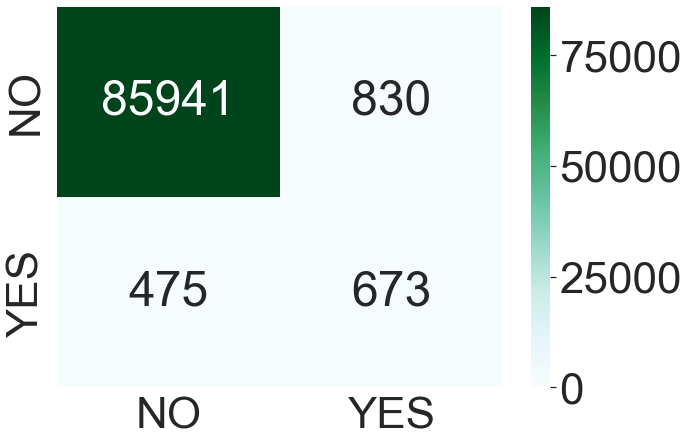

In [9]:
import seaborn as sn
sn.set(font_scale=4)

df_cm = pd.DataFrame(matrix, index = [i for i in ['NO','YES']],
                  columns = [i for i in ['NO','YES']])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, vmin = 0, annot=True,fmt='2g',cmap = 'BuGn')

### MCC for 95 percentile optimal range

In [18]:
df_avg = do.average(df,0.1,7.3)
len(df_avg)

45044

In [19]:
y_true = df_avg['precipBelow6'].to_numpy()>1.95
y_pred = df_avg['avgh001h073'].to_numpy()>4.53
matthews_corrcoef(y_true, y_pred)

0.5262394447436713

In [20]:
confusion_matrix(y_true, y_pred)

array([[43699,   483],
       [  371,   491]])

### MCC for 94 percentile optimal range

In [21]:
df_avg = do.average(df,0.1,6.8)
len(df_avg)

42599

In [22]:
y_true = df_avg['precipBelow6'].to_numpy()>1.73
y_pred = df_avg['avgh001h068'].to_numpy()>4.29
matthews_corrcoef(y_true, y_pred)

0.5394808295129833

In [23]:
confusion_matrix(y_true, y_pred)

array([[41070,   532],
       [  417,   580]])

### MCC for 93 percentile optimal range

In [24]:
df_avg = do.average(df,0.1,7.4)
len(df_avg)

45044

In [25]:
y_true = df_avg['precipBelow6'].to_numpy()>1.50
y_pred = df_avg['avgh001h074'].to_numpy()>3.79
matthews_corrcoef(y_true, y_pred)

0.5467261991339092

In [26]:
confusion_matrix(y_true, y_pred)

array([[43216,   615],
       [  504,   709]])

### MCC for 92 percentile optimal range

In [27]:
df_avg = do.average(df,0.2,6.7)
len(df_avg)

45044

In [28]:
y_true = df_avg['precipBelow6'].to_numpy()>1.31
y_pred = df_avg['avgh002h067'].to_numpy()>3.33
matthews_corrcoef(y_true, y_pred)

0.5618726327612388

In [29]:
confusion_matrix(y_true, y_pred)

array([[42818,   821],
       [  509,   896]])

### MCC for 91 percentile optimal range

In [30]:
df_avg = do.average(df,0.1,5.2)
len(df_avg)

34338

In [32]:
y_true = df_avg['precipBelow6'].to_numpy()>1.24
y_pred = df_avg['avgh001h052'].to_numpy()>3.52
matthews_corrcoef(y_true, y_pred)

0.5734978833744017

In [33]:
confusion_matrix(y_true, y_pred)

array([[32387,   713],
       [  427,   811]])

### MCC for 90 percentile optimal range

In [34]:
df_avg = do.average(df,0.7,8.6)
len(df_avg)

68174

In [36]:
y_true = df_avg['precipBelow6'].to_numpy()>1.04
y_pred = df_avg['avgh007h086'].to_numpy()>2.46
matthews_corrcoef(y_true, y_pred)

0.5755146597417428

In [37]:
confusion_matrix(y_true, y_pred)

array([[64616,  1251],
       [  822,  1485]])